In [6]:
import numpy as np
import matplotlib.pyplot as plt 
rng = np.random.default_rng()
from dadapy.id_discrete import IdDiscrete
%load_ext autoreload
%autoreload 2

# Test on uniform distribution

1. create the dataset

In [2]:
N = 2500
box = 50
d = 5
data = rng.integers(0,box,size=(N, d))

2. load into the estimator and compute distances
    1. if condensed=False, one stores point-point distances. This option is useful to trace WHICH are the neighbours, but can be memory demanding, as in principle the information is stored in to an NxN matrix (or N x maxk, that is, however, truncated to the mxk neighbour). Generally one wants to store a matrix which is 10^8 at most
    2. if condensed=True, one stores the cumulative of how many points there within a given distance. One deals with a N x d_max matrix that stores all information if d_max is the maximum possible distance between two points of the dataset. It is recommended to set 'condensed'=True for datasets bigger than 30k points. In this second case it is still possible to keep trace of the indices of the closest neigbours by fixing maxk to the desired value

In [43]:
I3D = IdDiscrete(data, condensed=False, maxk=data.shape[0]-1)
# use Periodic Boundary Condition if it makes sense through the flag 'period'. If it is not possible, simply remove the flag
I3D.compute_distances(metric='manhattan',period=box)

3. In order to have an idea of the mean distances between points, one look at I3D.distances 

In [4]:
print('mean distance of first neighbour: ',I3D.distances[:,1].mean())
print('mean distance of second neighbour: ',I3D.distances[:,2].mean())

mean distance of first neighbour:  12.4664
mean distance of second neighbour:  14.97


3. 
    1. If you are using condensed=True, you should look at where are positioned the first neighbours
    

In [45]:
I3D = IdDiscrete(data, condensed=True, maxk=data.shape[0])
# use Periodic Boundary Condition if it makes sense through the flag 'period'. If it is not possible, simply remove the flag
I3D.compute_distances(metric='manhattan',d_max=box*d,period=box)

In [48]:
dist_1NN = np.mean([np.where(dd>1)[0][0] for dd in I3D.distances])
print('mean distance of first neighbour: ',dist_1NN)
dist_2NN = np.mean([np.where(dd>2)[0][0] for dd in I3D.distances])
print('mean distance of first neighbour: ',dist_2NN)

mean distance of first neighbour:  12.4664
mean distance of first neighbour:  14.97


4. By using the function compute_id_binomial_k one computes the id taking into account the first k neighbours for each point. The function returns the ID estimate, the error and the scale

In [50]:
I3D.compute_id_binomial_k(20,False,0.5)

(5.119750620484287, 0.1511411827726006, 23.6024)

4. 
    1. In order to check the distance of the k-th neighbour one can access the instance lk of the class

In [52]:
print(I3D.lk)
print(I3D.lk.mean())

[23 24 24 ... 25 24 22]
23.6024


5. Once you have an idea of the scales at which points are placed, one can compute the ID at a precise, physical and meaningful scale by fixing the radii of the two shells used for the comparison. The function returns the ID, its error and the scale. One can choose between a maximum likelihood estimation setting method='mle' or a bayesian approach, setting method='bayes'. The two basically give the same results if the number of point is greater than 100. Nonetheless, the bayesian approach returns the profile of the posterior if plot=True

In [21]:
I3D.compute_id_binomial_lk(15,12,'mle')

(5.186677787209978, 0.09960381541151085, 15)

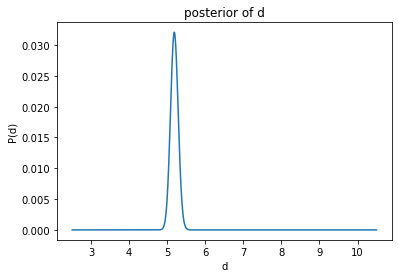

empirical average:	 5.186791121253544 
empirical std:		 0.09959554235751548


(5.186791121253544, 0.09959554235751548, 15)

In [22]:
I3D.compute_id_binomial_lk(15,12,'bayes',plot=True)

5. 
    1. In order to check how many neighbours were taken into account, one can access the instance k of the class

In [53]:
print(I3D.k)
print(I3D.k.mean())

[19 20 17 ... 20 20 16]
18.1712


6. One can check the goodness of the estimate using two quantities: 
    1. the comparison of local density of points within the inner radius and the density of points in the shell between the two radii. In particular one wish to obsercve the points staying as close as possible to the 

average distance from line:  0.5395406118468088


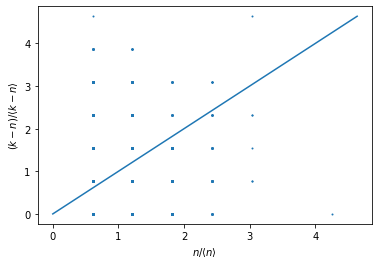

In [23]:
I3D.compute_local_density();

6. and
    2. the Kolmogorov-Smirnoff test between the theoretical and the empirical distributions of points n, within the inner shell

ks_stat:	0.0156
p-value:	0.9213408138806999


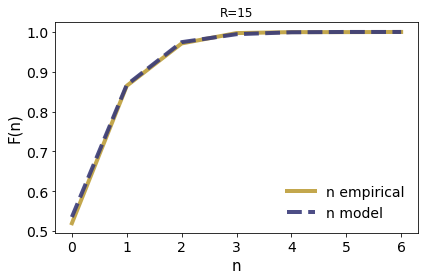

0.9213408138806999

In [24]:
I3D.model_validation_full()

7. the scaling (id as a function of the distance) can be obtained using the function return_id_scaling, setting the range of distances and the ratio between the shells (0.5 by default, get closer to 1 if the id ~ 10)

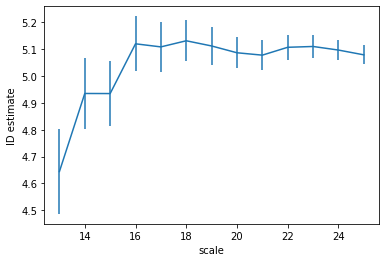

In [26]:
ids, id_er = I3D.return_id_scaling(range(13,26),0.5)

7. One can perform the estimate using only a subset of point by simply adding subset=your_index_list at the various compute/return_id functions (you can also provide an integer number, a random subsample of that size will be used)

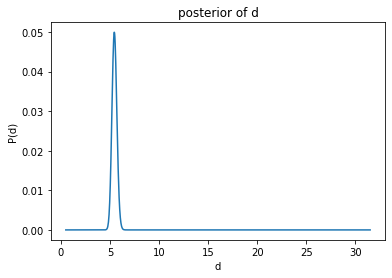

empirical average:	 5.457421931959039 
empirical std:		 0.24827558624863208


(5.457421931959039, 0.24827558624863208, 20)

In [27]:
I3D.compute_id_binomial_lk(20,15,subset=np.arange(100))